<a href="https://colab.research.google.com/github/MyeongGuJo/HAI-hands-on-MNIST/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# 2. 데이터셋 불러오기
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 480kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.02MB/s]


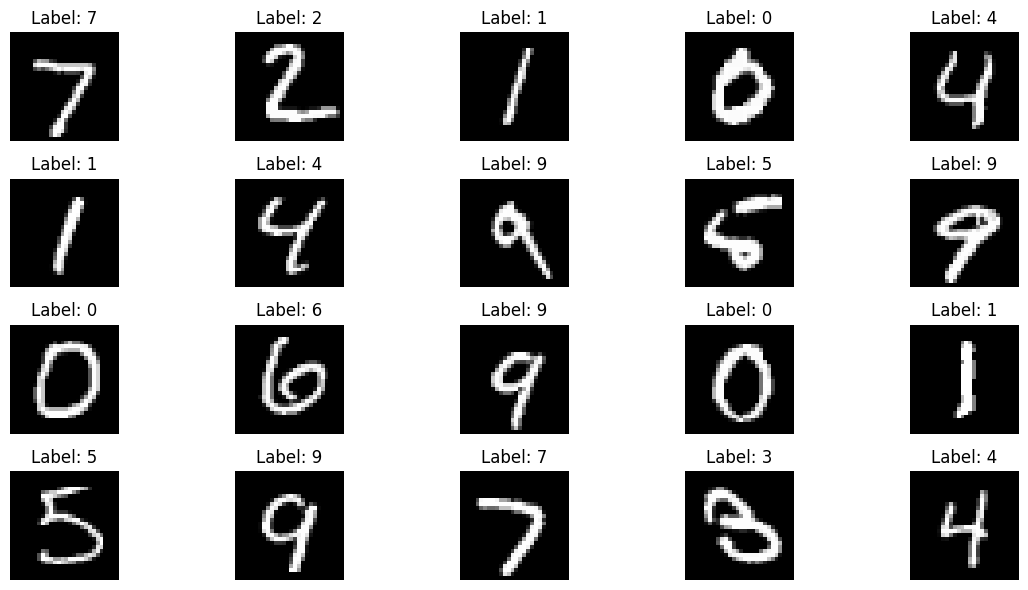

In [15]:
# 2.5. 데이터 확인
examples = next(iter(test_loader))
images, labels = examples

plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

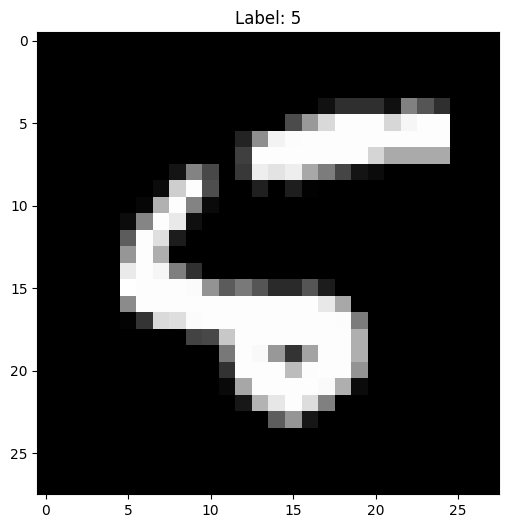

In [18]:
index = 8
noisy_img = images[index][0]
noisy_label = labels[index]

plt.figure(figsize=(12, 6))
plt.imshow(noisy_img, cmap='gray')
plt.title(f"Label: {noisy_label.item()}")
plt.show()

In [3]:
# 3. 학습 및 테스트 함수 정의
def train_model(model, epochs=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}")
        for x, y in pbar:
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            pbar.set_postfix({'Loss': total_loss / (pbar.n + 1)})
        print(f"[Epoch {epoch+1}] Total Loss: {total_loss:.4f}")

def evaluate_model(model):
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for x, y in test_loader:
            outputs = model(x)
            _, predicted = torch.max(outputs, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    acc = 100 * correct / total
    print(f"Accuracy: {acc:.2f}%")
    return acc

In [4]:
# 4. 로지스틱 회귀 모델
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(28*28, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.linear(x)

In [5]:
# 5. MLP 모델
class MLPModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

In [6]:
# 6. CNN 모델
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1   = nn.Linear(32*7*7, 128)
        self.fc2   = nn.Linear(128, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # 28x28 → 14x14
        x = self.pool(self.relu(self.conv2(x)))  # 14x14 → 7x7
        x = x.view(-1, 32*7*7)
        x = self.relu(self.fc1(x))
        return self.fc2(x)

In [7]:
# 7. 모델 학습 및 평가
models = {
    'Logistic Regression': LogisticRegressionModel(),
    'MLP': MLPModel(),
    'CNN': CNNModel()
}

results = {}
for name, model in models.items():
    print(f"\n🔧 Training: {name}")
    train_model(model, epochs=5)
    acc = evaluate_model(model)
    results[name] = acc


🔧 Training: Logistic Regression


Epoch 1: 100%|██████████| 938/938 [00:09<00:00, 97.06it/s, Loss=0.549] 


[Epoch 1] Total Loss: 511.2289


Epoch 2: 100%|██████████| 938/938 [00:09<00:00, 103.00it/s, Loss=0.326]


[Epoch 2] Total Loss: 303.4486


Epoch 3: 100%|██████████| 938/938 [00:08<00:00, 112.12it/s, Loss=0.299]


[Epoch 3] Total Loss: 277.1519


Epoch 4: 100%|██████████| 938/938 [00:07<00:00, 119.97it/s, Loss=0.282]


[Epoch 4] Total Loss: 264.4207


Epoch 5: 100%|██████████| 938/938 [00:08<00:00, 112.50it/s, Loss=0.277]


[Epoch 5] Total Loss: 256.8250
Accuracy: 92.52%

🔧 Training: MLP


Epoch 1: 100%|██████████| 938/938 [00:10<00:00, 88.60it/s, Loss=0.3]


[Epoch 1] Total Loss: 281.2258


Epoch 2: 100%|██████████| 938/938 [00:10<00:00, 87.61it/s, Loss=0.118]


[Epoch 2] Total Loss: 109.9098


Epoch 3: 100%|██████████| 938/938 [00:10<00:00, 87.15it/s, Loss=0.0773]


[Epoch 3] Total Loss: 72.3969


Epoch 4: 100%|██████████| 938/938 [00:10<00:00, 87.01it/s, Loss=0.0553]


[Epoch 4] Total Loss: 51.6643


Epoch 5: 100%|██████████| 938/938 [00:11<00:00, 82.39it/s, Loss=0.0429]


[Epoch 5] Total Loss: 40.2409
Accuracy: 98.03%

🔧 Training: CNN


Epoch 1: 100%|██████████| 938/938 [00:28<00:00, 32.41it/s, Loss=0.229]


[Epoch 1] Total Loss: 214.7588


Epoch 2: 100%|██████████| 938/938 [00:29<00:00, 31.89it/s, Loss=0.0632]


[Epoch 2] Total Loss: 59.2404


Epoch 3: 100%|██████████| 938/938 [00:29<00:00, 31.28it/s, Loss=0.043]


[Epoch 3] Total Loss: 40.3591


Epoch 4: 100%|██████████| 938/938 [00:29<00:00, 31.61it/s, Loss=0.0331]


[Epoch 4] Total Loss: 30.9912


Epoch 5: 100%|██████████| 938/938 [00:32<00:00, 29.23it/s, Loss=0.0254]


[Epoch 5] Total Loss: 23.8366
Accuracy: 98.93%


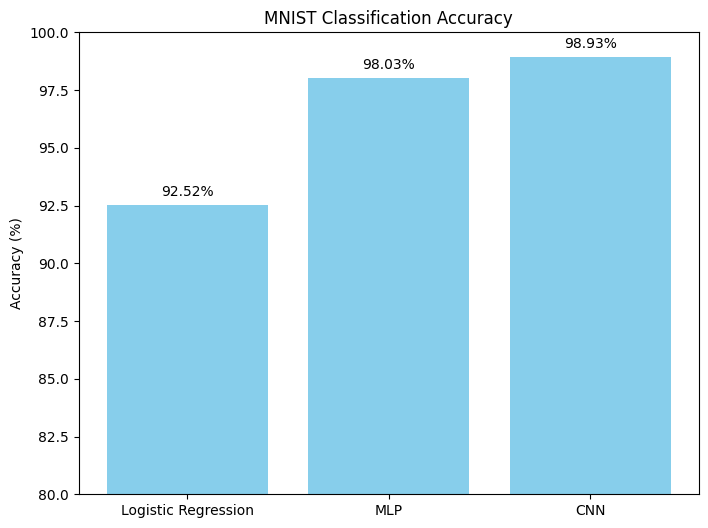

In [14]:
# 8. 성능 비교 시각화
plt.figure(figsize=(8, 6))
bars = plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('MNIST Classification Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(80, 100)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.25, f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()

In [23]:
for model_name in models:
    noisy_input = noisy_img.unsqueeze(0)
    outputs = models[model_name](noisy_input)
    _, predicted = torch.max(outputs, 1)
    print(predicted)

tensor([6])
tensor([5])
tensor([5])
